In [1]:
import pandas as pd
import numpy as np
import seaborn as sn


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:

data = pd.read_csv('../data/processed_data.csv')
data = data.drop(data.columns[0], axis=1)
data.head()

,cannabis,alcohol,U031D1,U031D6St,U031D3id_1,U031D3id_2,U031D3id_3,U031D3id_4,U031D3id_5,U031D3id_6,...,U031WE26_7,U031WE26_8,U031WE9R,U031WE17R,U031WE18R,U031WE13R,U031WE14R,U031WE15R,U031WE19R,U031WE20R
0,0.0,0.0,1.0,17.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,3.0,1.0,1.0,2.0,3.0,3.0,1.0,1.0
1,1.0,1.0,1.0,17.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0
2,0.0,0.0,1.0,17.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,1.0,1.0,2.0,3.0,3.0,1.0,1.0
3,0.0,0.0,2.0,17.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,3.0,2.0,2.0,1.0,3.0,4.0,1.0,1.0
4,0.0,0.0,1.0,13.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,1.0,1.0,2.0,3.0,3.0,1.0,1.0


In [3]:
# here I used features that I extracted from RFE analysis
# Top 20 features from RFE = extra tree


feature_names = ['U031AE1R', 'U031WE20R', 'U031CO8R', 'U031SE7R',
                            'U031SV24R', 'U031PS1R', 'U031SV23R2', 'U031EI5R',
                            'U031EI6R', 'U031AE3R', 'U031FI3R', 'U031EI7R', 
                            'U031SE1R', 'U031SE6R', 'U031D6St', 'U031FI2R', 
                            'U031WE26_8', 'U031WE13R', 'U031EI8R', 'U031EI1R']

In [4]:
# Assuming df is your DataFrame and final_list is your list of columns to keep
final_list = ['cannabis']+ feature_names
data = data[final_list]

# Display the filtered DataFrame
data.head()

,cannabis,U031AE1R,U031WE20R,U031CO8R,U031SE7R,U031SV24R,U031PS1R,U031SV23R2,U031EI5R,U031EI6R,...,U031FI3R,U031EI7R,U031SE1R,U031SE6R,U031D6St,U031FI2R,U031WE26_8,U031WE13R,U031EI8R,U031EI1R
0,0.0,3.0,1.0,3.0,3.0,0.0,3.0,0.0,1.0,1.0,...,2.0,2.0,3.0,3.0,17.0,3.0,1.0,2.0,1.0,1.0
1,1.0,3.0,2.0,3.0,3.0,0.0,4.0,0.0,2.0,2.0,...,2.0,2.0,3.0,4.0,17.0,3.0,0.0,3.0,2.0,4.0
2,0.0,3.0,1.0,3.0,3.0,0.0,3.0,0.0,1.0,1.0,...,3.0,1.0,3.0,3.0,17.0,3.0,1.0,2.0,1.0,2.0
3,0.0,4.0,1.0,3.0,3.0,0.0,3.0,0.0,1.0,1.0,...,2.0,2.0,3.0,3.0,17.0,3.0,1.0,1.0,1.0,2.0
4,0.0,3.0,1.0,3.0,3.0,0.0,3.0,0.0,1.0,1.0,...,3.0,1.0,3.0,3.0,13.0,3.0,1.0,2.0,1.0,2.0


# Data Pre-processing

In [5]:
# Import necessary libraries
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

# Split the data into features and target
X = data.iloc[:, 1:]  # Features after excluding the first column as it's the target
y = data['cannabis']  # target

# normally I use upsampling for this with below code 
#resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='not majority'))


# Initialize the RandomUnderSampler -  
# Retained all positive cannabis use cases and randomly removed negative cases  
# until achieving an equal number of positive and negative cases.
resample = RandomUnderSampler(sampling_strategy='auto')  # Balance classes equally

# Apply resampling
X_resampled, y_resampled = resample.fit_resample(X, y)

# Randomly sample 5000 cases for demonstration -it is now over 15K
indices = np.random.choice(len(y_resampled), 7000, replace=True)  # Generate 5000 random indices

# Select the samples using integer indexing
X_sampled = X_resampled.iloc[indices, :]                   # Use .iloc for DataFrame
y_sampled = np.array(y_resampled)[indices]                 # Convert to NumPy for indexing

# Display results
print("Sampled X shape:", X_sampled.shape)  # Feature size
print("Sampled y shape:", y_sampled.shape)  # Target size
print("Sampled y distribution:", Counter(y_sampled))  # Class balance


Sampled X shape: (7000, 20)
Sampled y shape: (7000,)
Sampled y distribution: Counter({0.0: 3559, 1.0: 3441})


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler



# Split the data into train (70%), test (15%), and validation (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X_sampled, y_sampled, stratify=y_sampled, test_size=0.30, random_state=12
)

X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, stratify=y_temp, test_size=0.50, random_state=12
)


# Verify split sizes
print(f"Total samples: {len(X_train) + len(X_test) + len(X_val)} (Expected: 7000)\n")

# Print shapes of each split
print(f"Training set X shape: {X_train.shape}, y shape: {y_train.shape}")
print(f"Test set X shape: {X_test.shape}, y shape: {y_test.shape}")
print(f"Validation set X shape: {X_val.shape}, y shape: {y_val.shape}")

# Print distribution of target variable
print(f"Training set distribution: {Counter(y_train)}")
print(f"Test set distribution: {Counter(y_test)}")
print(f"Validation set distribution: {Counter(y_val)}")


# Normalize the data using RobustScaler (z-score normalization alternative for robustness)
scaler = RobustScaler()

# Fit and transform the training data
X_train_std = scaler.fit_transform(X_train)

# Transform test and validation data using the same scaler
X_test_std = scaler.transform(X_test)
X_val_std = scaler.transform(X_val)

# Verify scaled data shapes
print(f"\nScaled Training set shape: {X_train_std.shape}")
print(f"Scaled Test set shape: {X_test_std.shape}")
print(f"Scaled Validation set shape: {X_val_std.shape}")

Total samples: 7000 (Expected: 7000)

Training set X shape: (4900, 20), y shape: (4900,)
Test set X shape: (1050, 20), y shape: (1050,)
Validation set X shape: (1050, 20), y shape: (1050,)
Training set distribution: Counter({0.0: 2491, 1.0: 2409})
Test set distribution: Counter({0.0: 534, 1.0: 516})
Validation set distribution: Counter({0.0: 534, 1.0: 516})

Scaled Training set shape: (4900, 20)
Scaled Test set shape: (1050, 20)
Scaled Validation set shape: (1050, 20)


# Model Building with Cross Validation


This pipeline is designed to **evaluate the performance of multiple machine learning algorithms** to identify the most promising models for further **hyperparameter tuning**. It provides a systematic approach to **model selection** by testing a variety of classifiers and comparing their performance using **cross-validation** metrics.  



### **Purpose:**  
- **Compare baseline performance** of different machine learning models using **weighted F1 scores**.  
- **Visualize results** with box plots to analyze performance variability and robustness across multiple folds.  
- Identify models that show **high performance and stability** as candidates for **hyperparameter optimization**.  


### **What You Will Learn:**  
1. **Model Evaluation and Selection:**  
   - Learn how to test and compare multiple classifiers efficiently.  
   - Understand the importance of **cross-validation** to ensure generalizability.  

2. **Baseline Performance Testing:**  
   - Evaluate standard machine learning models without tuning to establish **baseline metrics**.  
   - Use metrics like **F1-weighted scores** to assess performance in **imbalanced datasets**.  

3. **Visualization of Results:**  
   - Generate **box plots** to inspect score distributions and identify models with **low variance** and **consistent performance**.  

4. **Algorithm Variety:**  
   - Explore a wide range of classifiers, from **linear models** (e.g., Logistic Regression) to **ensemble methods** (e.g., Random Forest, AdaBoost) and **neural networks** (MLP).  
   - Compare results to decide whether to focus on simpler models or complex architectures.  



In [11]:
# Load libraries
# plot
import matplotlib.pyplot as plt
from chart_studio.plotly import plot, iplot
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)
import matplotlib.font_manager

#models                   
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier



In [12]:
# Spot-Check Algorithms
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression(max_iter= 1000)))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('ADA'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))
    basedModels.append(('Bagging'   , BaggingClassifier()))
    basedModels.append(('XGBoost'   , XGBClassifier(eval_metric='mlogloss')))
    basedModels.append(('ANN', MLPClassifier(max_iter=1000)))  # Multi-layer Perceptron (MLP) 

    return basedModels

In [13]:
def BasedLine(X_train, y_train, models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'f1_weighted'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=42, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [14]:
class PlotBoxR(object):

    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)

In [16]:
models = GetBasedModel()
names,results = BasedLine(X_train_std, y_train, models)
PlotBoxR().PlotResult(names,results)

LR: 0.774628 (0.017982)
LDA: 0.773261 (0.016622)
KNN: 0.742748 (0.015685)
CART: 0.771684 (0.019676)
NB: 0.736742 (0.017142)
SVM: 0.778886 (0.020889)
ADA: 0.772145 (0.014055)
GBM: 0.784019 (0.011236)
RF: 0.831415 (0.012074)
ET: 0.823231 (0.016702)
Bagging: 0.801493 (0.019248)
XGBoost: 0.815898 (0.017450)
ANN: 0.794202 (0.016253)


# Cross-Validation and Hyper Parameters Tuning

In [17]:
from sklearn.model_selection import RandomizedSearchCV

def fine_tune_model_with_randomsearch(model, param_grid, X_train, y_train, X_val, y_val, scoring="f1_weighted", cv=10, n_iter=50, random_state=42):
    """
    Fine-tunes a given model using RandomizedSearchCV with validation data.
    
    Args:
        model: The machine learning model to fine-tune.
        param_grid: Dictionary of hyperparameters for RandomizedSearchCV.
        X_train: Training features.
        y_train: Training labels.
        X_val: Validation features.
        y_val: Validation labels.
        scoring: Scoring metric for RandomizedSearchCV.
        cv: Number of cross-validation folds.
        n_iter: Number of parameter settings sampled for RandomizedSearchCV.
        random_state: Random state for reproducibility.
    
    Returns:
        best_model: The best model found by RandomizedSearchCV.
        best_params: The best hyperparameters.
        val_score: Performance score on validation data.
        search_results: The RandomizedSearchCV results dataframe.
    """
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        scoring=scoring,
        cv=cv,
        n_jobs=-1,
        n_iter=n_iter,
        random_state=random_state,
        verbose=0  # Suppress detailed logs during search
    )
    random_search.fit(X_train, y_train)
    
    best_model = random_search.best_estimator_
    best_params = random_search.best_params_
    best_score = random_search.best_score_
    
    # Display only the best parameters and score
    print(f"\nBest Parameters for {model.__class__.__name__}: {best_params}")
    print(f"Best Cross-Validation F1 Weighted Score: {best_score:.4f}")
    
    # Evaluate on validation data
    y_val_pred = best_model.predict(X_val)
    val_score = metrics.f1_score(y_val, y_val_pred, average="weighted")
    print(f"Validation F1 Weighted Score: {val_score:.4f}")
    
    search_results = pd.DataFrame(random_search.cv_results_)
    return best_model, best_params, val_score, search_results


In [18]:
def fine_tune_model_with_gridsearch(model, param_grid, X_train, y_train, X_val, y_val, scoring="f1_weighted", cv=10):
    """
    Fine-tunes a given model using GridSearchCV with validation data.
    
    Args:
        model: The machine learning model to fine-tune.
        param_grid: Dictionary of hyperparameters for GridSearchCV.
        X_train: Training features.
        y_train: Training labels.
        X_val: Validation features.
        y_val: Validation labels.
        scoring: Scoring metric for GridSearchCV.
        cv: Number of cross-validation folds.
    
    Returns:
        best_model: The best model found by GridSearchCV.
        best_params: The best hyperparameters.
        val_score: Performance score on validation data.
        grid_results: The GridSearchCV results dataframe.
    """
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring=scoring,
        cv=cv,
        n_jobs=-1,
        verbose=0  # Suppress detailed logs during search
    )
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Display only the best parameters and score
    print(f"\nBest Parameters for {model.__class__.__name__}: {best_params}")
    print(f"Best Cross-Validation F1 Weighted Score: {best_score:.4f}")
    
    # Evaluate on validation data
    y_val_pred = best_model.predict(X_val)
    val_score = metrics.f1_score(y_val, y_val_pred, average="weighted")
    print(f"Validation F1 Weighted Score: {val_score:.4f}")
    
    grid_results = pd.DataFrame(grid_search.cv_results_)
    return best_model, best_params, val_score, grid_results


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np
import joblib
import os

def fine_tune_and_save(models, param_grids, X_train, y_train, X_val, y_val, X_test, y_test, save_dir, search_type="grid", n_iter=50):
    """
    Fine-tunes multiple models using GridSearchCV or RandomizedSearchCV with validation data and evaluates on test data.
    """
    results_summary = []
    for model_name, model in models.items():
        print(f"Fine-tuning model: {model_name} using {search_type.capitalize()}SearchCV")
        param_grid = param_grids.get(model_name)
        
        if search_type == "grid":
            best_model, best_params, val_score, search_results = fine_tune_model_with_gridsearch(
                model, param_grid, X_train, y_train, X_val, y_val, scoring="f1_weighted"
            )
        elif search_type == "random":
            best_model, best_params, val_score, search_results = fine_tune_model_with_randomsearch(
                model, param_grid, X_train, y_train, X_val, y_val, scoring="f1_weighted", n_iter=n_iter
            )
        else:
            raise ValueError("Invalid search_type. Choose either 'grid' or 'random'.")
        
        # Evaluate on test data
        y_test_pred = best_model.predict(X_test)
        
        # Calculate metrics
        scores = {
            "Model": model_name,
            "Accuracy": np.round(metrics.accuracy_score(y_test, y_test_pred), 4),
            "Precision": np.round(metrics.precision_score(y_test, y_test_pred, average='weighted'), 4),
            "Recall": np.round(metrics.recall_score(y_test, y_test_pred, average='weighted'), 4),
            "F1 Score": np.round(metrics.f1_score(y_test, y_test_pred, average='weighted'), 4),
            "Cohen Kappa": np.round(metrics.cohen_kappa_score(y_test, y_test_pred), 4),
            "Matthews Corrcoef": np.round(metrics.matthews_corrcoef(y_test, y_test_pred), 4),
        }
        try:
            scores["ROC AUC"] = np.round(metrics.roc_auc_score(y_test, y_test_pred, average="weighted"), 4)
        except ValueError:
            scores["ROC AUC"] = "Not Applicable"
        
        results_summary.append(scores)
        
        # Classification Report
        class_report = classification_report(y_test, y_test_pred, target_names=[str(c) for c in np.unique(y_test)])
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_test_pred)
        cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
        
        # Save individual results
        model_save_dir = os.path.join(save_dir, model_name)
        os.makedirs(model_save_dir, exist_ok=True)
        
        # Save metrics as a single text file
        metrics_save_path = os.path.join(model_save_dir, f"{model_name}_metrics.txt")
        with open(metrics_save_path, "w") as f:
            for metric, value in scores.items():
                f.write(f"{metric}: {value}\n")
            f.write("\nClassification Report:\n")
            f.write(class_report)
            f.write("\nConfusion Matrix:\n")
            f.write(np.array2string(cm, separator=", "))

        # Visualize confusion matrix using seaborn
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
        plt.title(f"Confusion Matrix for {model_name}")
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        
        # Save confusion matrix heatmap as an image
        cm_image_path = os.path.join(model_save_dir, f"{model_name}_confusion_matrix.png")
        plt.savefig(cm_image_path, dpi=300, bbox_inches='tight')
        plt.close()
        
        # Save search results
        search_results.to_csv(os.path.join(model_save_dir, f"{model_name}_{search_type}_search_results.csv"), index=False)
        
        # Save the best model
        joblib.dump(best_model, os.path.join(model_save_dir, f"{model_name}_best_model.pkl"))
        
        print(f"Completed saving results for {model_name}.\n")
    
    # Return all results for summary
    return results_summary


In [20]:
def summarize_results(results_summary, save_dir):
    """
    Combines individual model results into a summary table and saves it.
    
    Args:
        results_summary: List of dictionaries containing model metrics.
        save_dir: Directory to save the summary table.
    """
    summary_df = pd.DataFrame(results_summary)
    summary_path = os.path.join(save_dir, "model_summary.csv")
    summary_df.to_csv(summary_path, index=False)
    print(f"Summary table saved at {summary_path}")
    return summary_df


In [21]:
#matplotlib.style.use(matplotlib.get_data_path()+'/stylelib/apa.mplstyle') # selecting the style sheet

# Models

In [22]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
import os 


# Define models
models = {
    "gbc": GradientBoostingClassifier(random_state=1),
    "xgboost": XGBClassifier(random_state=1, eval_metric="logloss"),
    "extra_trees": ExtraTreesClassifier(random_state=1),
    "random_forest": RandomForestClassifier(random_state=1),
}

# Define hyperparameter grids
param_grids = {
    "gbc": {
        "n_estimators": [100, 200, 250, 300],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 10]
    },
    "xgboost": {
        "n_estimators": [ 100, 200, 250, 300],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 10]
    },
    "extra_trees": {
        "n_estimators": [100, 200, 250, 300],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2]
    },
    "random_forest": {
        "n_estimators": [100, 200, 250, 300],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2]
    }
}





In [23]:
import time

start_time = time.time()


# Save directory
save_dir = "cannabis/smote_20_results"

# Using GridSearchCV
#fine_tune_and_save(models, param_grids, X_train_std, y_train, X_val_std, y_val, X_test_std, y_test, save_dir, search_type="grid")

# Using RandomizedSearchCV
results_summary = fine_tune_and_save(models, param_grids,
                   X_train_std, y_train,
                   X_val_std, y_val,
                   X_test_std, y_test, save_dir,
                   search_type="random", n_iter=20)

end_time = time.time()
print(f"Time taken: {(end_time - start_time) / 60:.2f} minutes")


Fine-tuning model: gbc using RandomSearchCV

Best Parameters for GradientBoostingClassifier: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1}
Best Cross-Validation F1 Weighted Score: 0.8265
Validation F1 Weighted Score: 0.8372
Completed saving results for gbc.

Fine-tuning model: xgboost using RandomSearchCV

Best Parameters for XGBClassifier: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1}
Best Cross-Validation F1 Weighted Score: 0.8275
Validation F1 Weighted Score: 0.8438
Completed saving results for xgboost.

Fine-tuning model: extra_trees using RandomSearchCV

Best Parameters for ExtraTreesClassifier: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}
Best Cross-Validation F1 Weighted Score: 0.8394
Validation F1 Weighted Score: 0.8391
Completed saving results for extra_trees.

Fine-tuning model: random_forest using RandomSearchCV

Best Parameters for RandomForestClassifier: {'n_estimators': 300, 'min_samples_split': 2, 'mi

In [24]:
summary_df = summarize_results(results_summary, save_dir)
summary_df


Summary table saved at cannabis/smote_20_results/model_summary.csv


,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa,Matthews Corrcoef,ROC AUC
0,gbc,0.8229,0.8239,0.8229,0.8228,0.6459,0.6469,0.8233
1,xgboost,0.8190,0.8204,0.8190,0.8190,0.6384,0.6396,0.8195
2,extra_trees,0.8267,0.8274,0.8267,0.8267,0.6535,0.6541,0.8270
3,random_forest,0.8286,0.8295,0.8286,0.8285,0.6573,0.6581,0.8289


## SHAP

In [34]:
import shap  # SHAP library for explainability

# Define the path to the saved model
save_dir = "cannabis/smote_20_results/extra_trees"
model_name = "extra_trees_best_model.pkl"  # Ensure the model was saved as a .pkl file

# Load the saved Extra Trees model
model_extra_trees = joblib.load(f"{save_dir}/{model_name}")

# Load or use preprocessed data
X_data = pd.DataFrame(X_train_std, columns=X_train.columns)  # Ensure X_train_std is preprocessed and standardized



In [35]:
# Create SHAP explainer for tree-based models
explainer = shap.TreeExplainer(model_extra_trees)


In [36]:
# Calculate SHAP values for the dataset
shap_values = explainer.shap_values(X_data)


In [42]:
print("SHAP values shape:", np.array(shap_values).shape)
print("Input data shape:", X_data.shape)


SHAP values shape: (4900, 20, 2)
Input data shape: (4900, 20)


In [45]:
# For binary classification, select SHAP values for the positive class (class 1)
if isinstance(shap_values, list):
    shap_values = shap_values[1]  # Use values for class 1


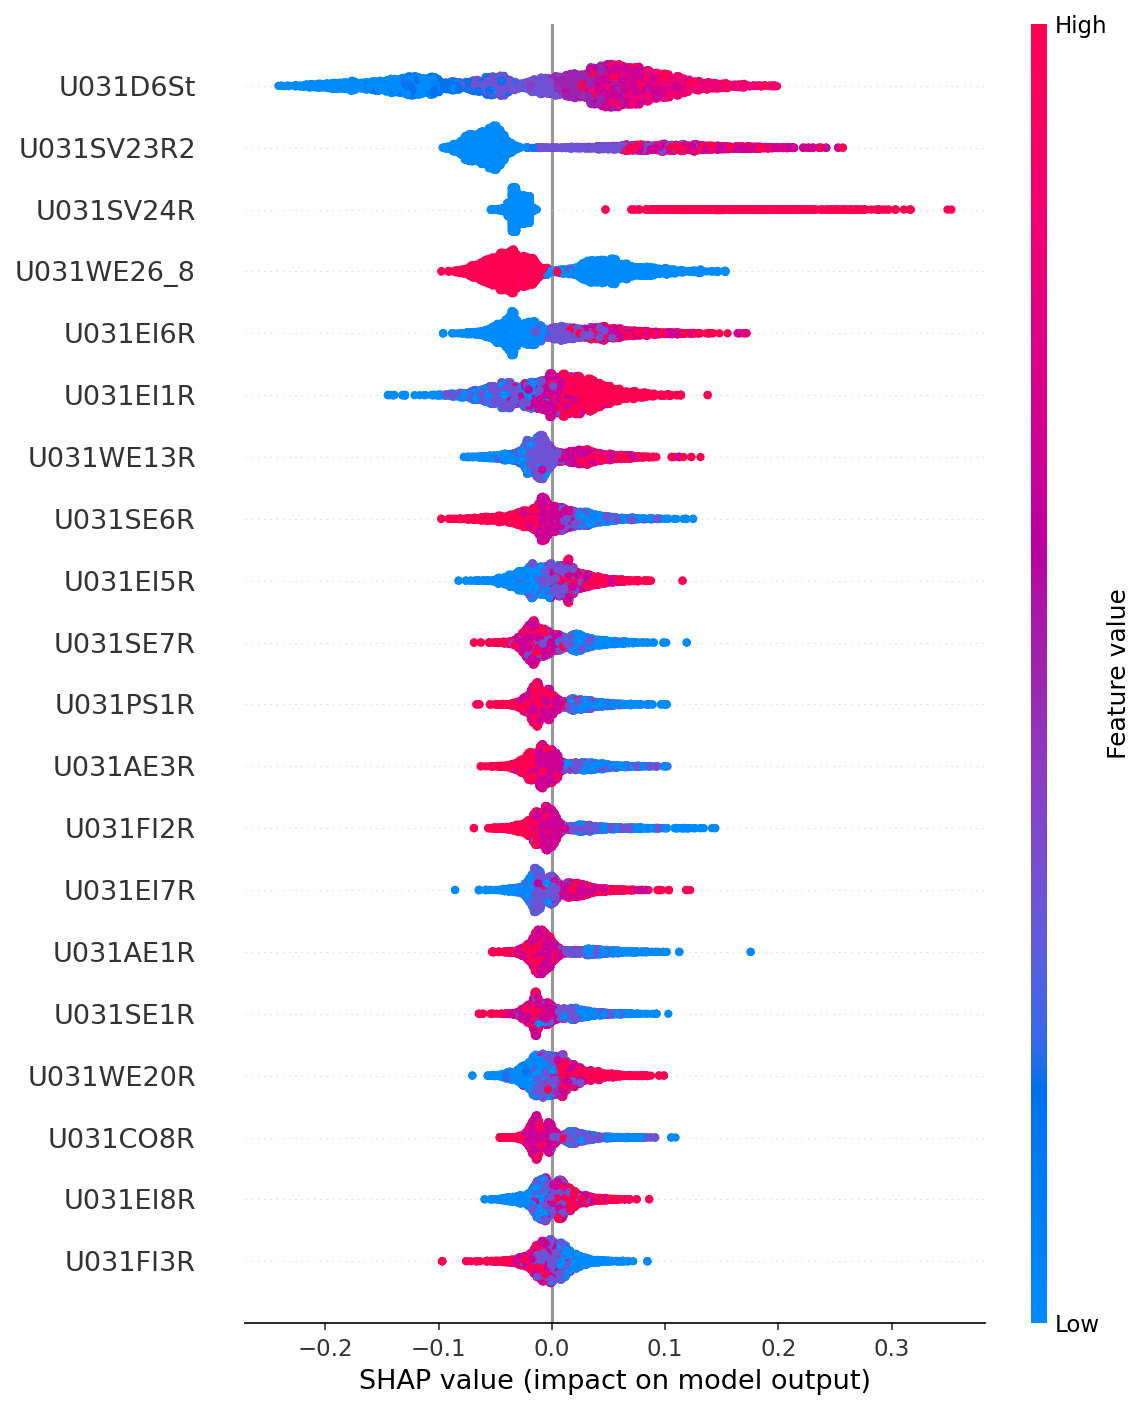

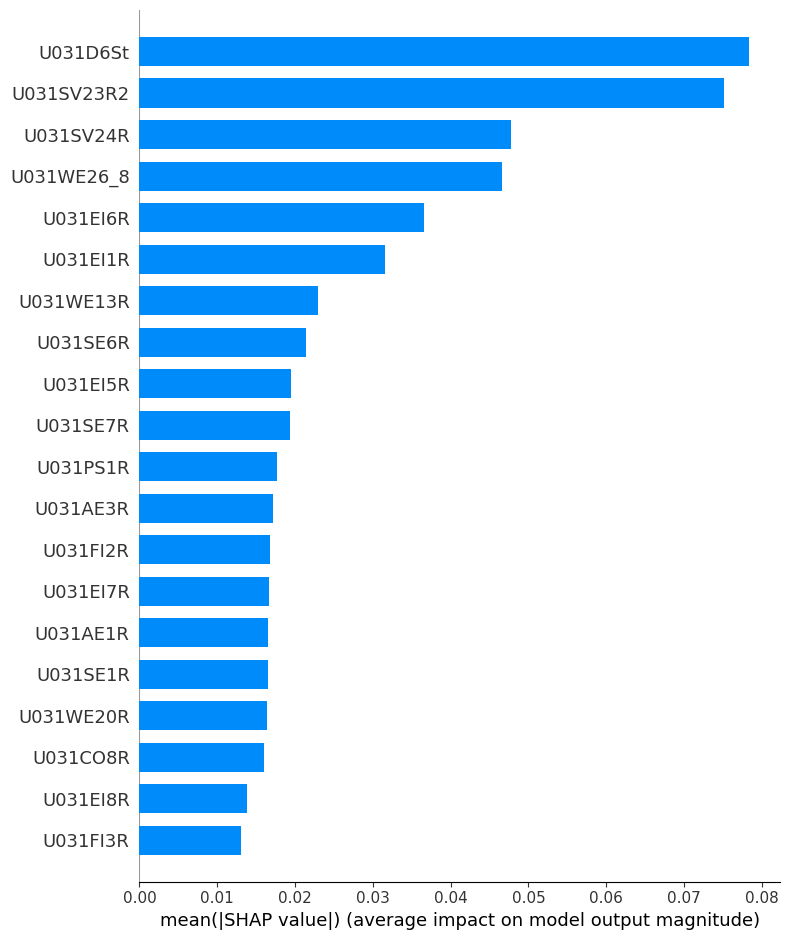

In [47]:
import shap
import matplotlib.pyplot as plt

# Select SHAP values for the positive class (class 1)
shap_values_class_1 = shap_values[:, :, 1]  # Select the second dimension (class 1)

# Ensure the plot size and resolution are suitable
plt.figure(figsize=(12, 8), dpi=150)

# Plot all features in one summary plot
shap.summary_plot(shap_values_class_1, X_data)

# Optional: Plot bar chart for feature importance
shap.summary_plot(shap_values_class_1, X_data, plot_type="bar")



### **Interpretation of the SHAP Summary Plot**  

This **SHAP summary plot**  (first plot) provides a **global explanation** of how features influence the model's predictions. It visualizes the **magnitude**, **direction**, and **distribution** of feature impacts on the model output. Here's how to interpret it step-by-step:



### **1. Feature Importance (Order)**  
- Features are **ranked by importance** from top to bottom.  
- The **top features** have the **largest impact** on the model's predictions.  
- In this plot, **U031D6St** is the most influential feature, followed by **U031SV23R2** and **U031SV24R**.  



### **2. SHAP Values (X-axis)**  
- The **X-axis** represents the **SHAP values**, which indicate the **impact on the model output**.  
  - **Positive SHAP values** (right side) push predictions **higher**.  
  - **Negative SHAP values** (left side) push predictions **lower**.  
- The **spread** of points along the X-axis shows the **range of influence** each feature has on predictions.  
  - **Wider spread** implies more **variation** in how the feature affects predictions.  
  - **Narrow spread** suggests a **consistent effect** across observations.



### **3. Feature Values (Color)**  
- The **color gradient** represents the **actual feature values** (e.g., low in blue, high in red).  
- **Patterns to observe:**
  - Features with **high values (red)** that cluster on the **positive SHAP side** increase predictions.  
  - Features with **low values (blue)** that cluster on the **negative side** decrease predictions.  

For example:
- **U031D6St** shows that **high feature values (red)** mostly have **positive SHAP values**, meaning higher values of this feature are associated with **higher predictions**.



### **4. Symmetry and Outliers**  
- Symmetrical patterns suggest **balanced effects**.  
- Outliers or isolated points might indicate **exceptions** where certain values strongly influence predictions.



### **5. Key Observations:**  
- Focus on the **top features** for further investigation or feature engineering.  
- Check if certain features have **non-linear relationships** or **interactions** (e.g., features with wider spreads).  
- Use these insights to **prioritize features** during **model tuning** or when explaining predictions to stakeholders.



### **Final Tip:**  
Use **dependence plots** to explore the relationship between individual features and predictions in more detail. This plot is excellent for **global understanding**, but for **local explanations**, switch to **force plots** or **waterfall plots**.  

Let me know if you'd like further clarifications!

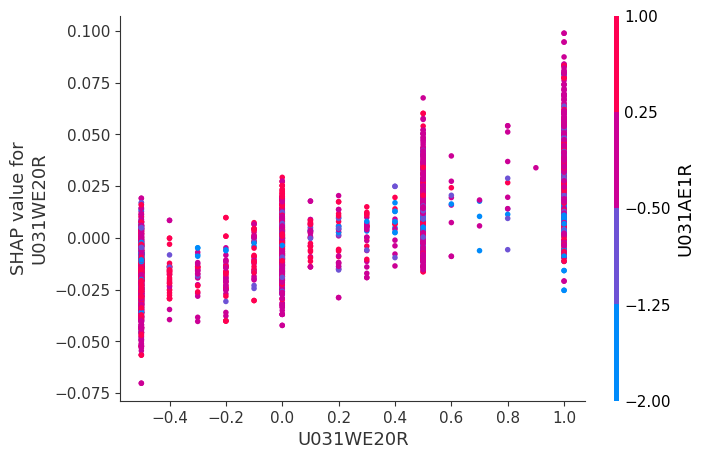

In [ ]:
# Dependence Plot (Feature Relationships and Interactions)

# Dependence plot for a specific feature
shap.dependence_plot(
    "U031WE20R",  # Replace with any feature name from your dataset
    shap_values_class_1, 
    X_data,
    interaction_index="U031AE1R"  # Specify interaction feature (optional, or let SHAP auto-detect)
)

# Purpose: Understand how U031WE20R interacts with U031AE1R to influence predictions.
# Customization: Replace feature names as needed.
# Output: Scatterplot showing trends, with colors representing interaction values.

In [ ]:
# Force Plot (Local Explanation for a Single Prediction)
# check your local computer for those libraries

# Force plot for a single prediction
shap.force_plot(
    explainer.expected_value[1],  # Expected value for class 1
    shap_values_class_1[0, :],   # SHAP values for the first observation
    X_data.iloc[0, :]            # Corresponding feature values
)

#Purpose: Visualizes individual predictions to understand why a specific output occurred.
#Output: Horizontal bar plot with feature effects pushing the prediction up or down.
#Note: For larger datasets, this may look better as HTML in Jupyter notebooks.

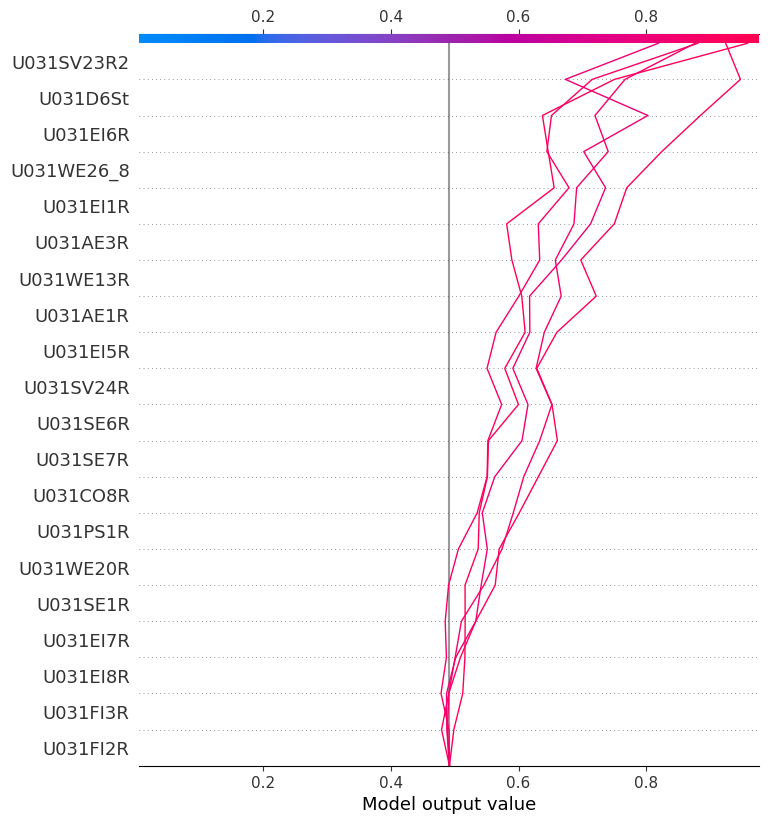

In [ ]:
# Decision Plot (Cumulative Effects Along Prediction Path)

shap.decision_plot(
    explainer.expected_value[1],  # Expected value for class 1
    shap_values_class_1[:5, :],  # First 5 samples for visualization
    X_data.iloc[:5, :]           # Corresponding feature values
)

#Purpose: Tracks how features incrementally influence predictions for specific observations.
#Output: Line plot showing feature contributions step-by-step.
#Tip: Increase the sample count (:5) for larger visualizations.

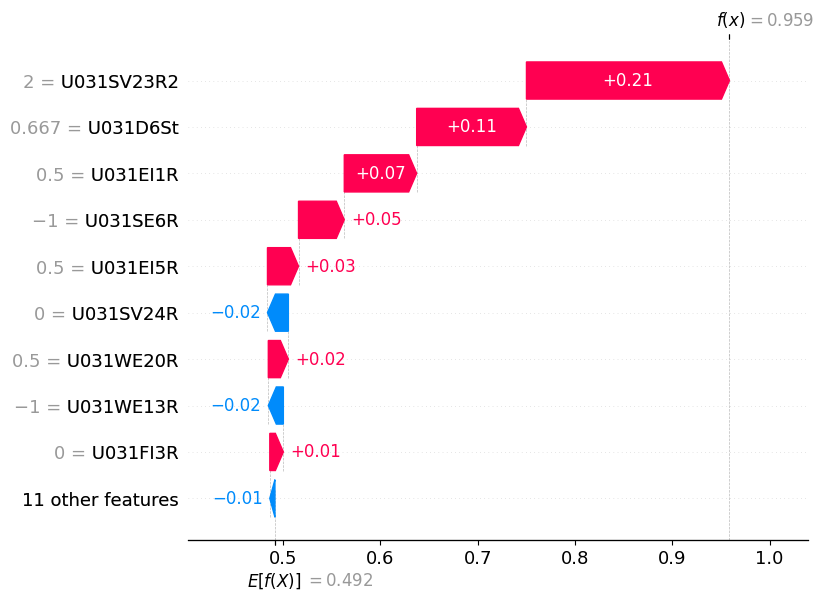

In [ ]:
# Waterfall Plot (Single Instance Explanation)

shap.plots.waterfall(
    shap.Explanation(values=shap_values_class_1[0], 
                     base_values=explainer.expected_value[1], 
                     data=X_data.iloc[0])
)

#Purpose: Breaks down feature impacts on predictions in an intuitive step-by-step format.
#Output: Waterfall-like contributions showing how the prediction was formed.
